---
# 2.1 Bisection method
---

Suppose $f \in C[a,b]$ and that $f(a)$ and $f(b)$ have opposite signs; i.e.,

$$
f(a) \cdot f(b) < 0.
$$

Recall the following important theorem from calculus.

> ### Intermediate Value Theorem
>
If $f \in C[a,b]$ and $f(a) \leq s \leq f(b)$, then there exists a real number $c \in [a,b]$ such that $f(c) = s$.

Since $f$ changes sign over $[a,b]$, the Intermediate Value Theorem implies that there is some $x^* \in [a,b]$ such that $f(x^*) = 0$.

The **bisection method** searches for a root of $f$ in $[a,b]$ as follows.

1. Let $p = (a+b)/2$ be the **midpoint** of $[a,b]$.
2. If $f(a) \cdot f(p) < 0$, then there is a root in $[a,p]$.
3. If $f(a) \cdot f(p) = 0$, then $p$ is a root.
4. If $f(a) \cdot f(p) > 0$, then there is a root in $[p,b]$.

Each time we apply the above, we get a subinterval that contains a root that is **half the size** of the interval $[a,b]$.

In [2]:
# Code the bisection method
using Printf
function bisect(f, a, b, tol=1e-8)
    fa, fb = f(a), f(b)
    
    if fa == 0.0
        return a
    elseif fb == 0.0
        return b
    end
        
    if fa*fb > 0
        error("The sign of f(a) and f(b) must be different.")
    end
    
    k = 0
    p = (a + b)/2
    oldp = Inf
    @printf "%4s %12s %12s %12s\n" "k" "a" "p" "b"
    while abs(p - oldp) > tol*(1 + abs(p))
        k += 1
        fp = f(p)
        if fp == 0.0
            return p
        end

        if fa*fp < 0
            b = p
        else
            a = p
        end
        oldp = p
        p = (a + b)/2
        @printf "%4d %12.8f %12.8f %12.8f\n" k a p b
    end
    
    return p
    
end

bisect (generic function with 2 methods)

In [3]:
f(x) = x^2 - 2

f (generic function with 1 method)

In [4]:
bisect(f, 0., 1.)

ErrorException: The sign of f(a) and f(b) must be different.

In [5]:
bisect(f, 0., 3.)

   k            a            p            b
   1   0.00000000   0.75000000   1.50000000
   2   0.75000000   1.12500000   1.50000000
   3   1.12500000   1.31250000   1.50000000
   4   1.31250000   1.40625000   1.50000000
   5   1.40625000   1.45312500   1.50000000
   6   1.40625000   1.42968750   1.45312500
   7   1.40625000   1.41796875   1.42968750
   8   1.40625000   1.41210938   1.41796875
   9   1.41210938   1.41503906   1.41796875
  10   1.41210938   1.41357422   1.41503906
  11   1.41357422   1.41430664   1.41503906
  12   1.41357422   1.41394043   1.41430664
  13   1.41394043   1.41412354   1.41430664
  14   1.41412354   1.41421509   1.41430664
  15   1.41412354   1.41416931   1.41421509
  16   1.41416931   1.41419220   1.41421509
  17   1.41419220   1.41420364   1.41421509
  18   1.41420364   1.41420937   1.41421509
  19   1.41420937   1.41421223   1.41421509
  20   1.41421223   1.41421366   1.41421509
  21   1.41421223   1.41421294   1.41421366
  22   1.41421294   1.41421330  

1.4142135456204414

In [6]:
xs = sqrt(2.0)

rt = bisect(f, 1., 100.)

abs(rt - xs) 

   k            a            p            b
   1   1.00000000  25.75000000  50.50000000
   2   1.00000000  13.37500000  25.75000000
   3   1.00000000   7.18750000  13.37500000
   4   1.00000000   4.09375000   7.18750000
   5   1.00000000   2.54687500   4.09375000
   6   1.00000000   1.77343750   2.54687500
   7   1.00000000   1.38671875   1.77343750
   8   1.38671875   1.58007813   1.77343750
   9   1.38671875   1.48339844   1.58007813
  10   1.38671875   1.43505859   1.48339844
  11   1.38671875   1.41088867   1.43505859
  12   1.41088867   1.42297363   1.43505859
  13   1.41088867   1.41693115   1.42297363
  14   1.41088867   1.41390991   1.41693115
  15   1.41390991   1.41542053   1.41693115
  16   1.41390991   1.41466522   1.41542053
  17   1.41390991   1.41428757   1.41466522
  18   1.41390991   1.41409874   1.41428757
  19   1.41409874   1.41419315   1.41428757
  20   1.41419315   1.41424036   1.41428757
  21   1.41419315   1.41421676   1.41424036
  22   1.41419315   1.41420496  

9.534903755437085e-9

---

### Example

We will now use the above `bisect` function to find the root of

$$
h(x) = 2 \cosh(x/4) - x
$$

that lies in the interval $[5,10]$.

In [7]:
h(x) = 2cosh(x/4) - x

h (generic function with 1 method)

In [8]:
h(5)h(10)

-2.769924839616351

In [9]:
bisect(x -> 2cosh(x/4) - x, 5., 10.)

   k            a            p            b
   1   7.50000000   8.75000000  10.00000000
   2   7.50000000   8.12500000   8.75000000
   3   8.12500000   8.43750000   8.75000000
   4   8.43750000   8.59375000   8.75000000
   5   8.43750000   8.51562500   8.59375000
   6   8.43750000   8.47656250   8.51562500
   7   8.47656250   8.49609375   8.51562500
   8   8.49609375   8.50585938   8.51562500
   9   8.50585938   8.51074219   8.51562500
  10   8.50585938   8.50830078   8.51074219
  11   8.50585938   8.50708008   8.50830078
  12   8.50708008   8.50769043   8.50830078
  13   8.50708008   8.50738525   8.50769043
  14   8.50708008   8.50723267   8.50738525
  15   8.50708008   8.50715637   8.50723267
  16   8.50715637   8.50719452   8.50723267
  17   8.50719452   8.50721359   8.50723267
  18   8.50719452   8.50720406   8.50721359
  19   8.50719452   8.50719929   8.50720406
  20   8.50719929   8.50720167   8.50720406
  21   8.50719929   8.50720048   8.50720167
  22   8.50719929   8.50719988  

8.507199510931969

---

### Example

Let's try to find the value of $y_0$ such that the solution $y(t)$ of the ordinary differential equation 

$$
\frac{dy}{dt} = t - 5 + \frac{y^2}{100}
$$

with initial value $y(0) = y_0$ satisfies $y(10) = 20$.

In [12]:
using ODE  # Package for solving ordinary differential equations

In [13]:
?ODE

search: ODE ode4 ode78 ode4s ode45 ode23 ode4ms ode23s ODEProblem ODESolution



No documentation found.

No docstring found for module `ODE`.


In [14]:
F(t, y) = t - 5 + y^2/100

F (generic function with 1 method)

In [15]:
using PyPlot

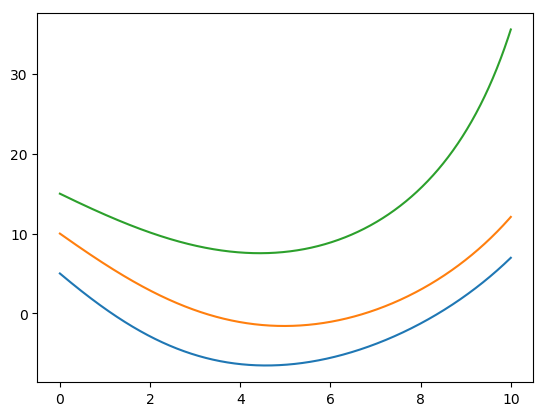

In [16]:
tspan = range(0, stop=10, length=1000)

y0 = 5.
tout, yout = ode4(F, y0, tspan)
plot(tout, yout);

y0 = 10.
tout, yout = ode4(F, y0, tspan)
plot(tout, yout);

y0 = 15.
tout, yout = ode4(F, y0, tspan)
plot(tout, yout);

In [17]:
function foo(y0)
    tspan = range(0, stop=10, length=100000)
    tout, yout = ode4((t, y) -> t - 5 + y^2/100, y0, tspan)
    return yout[end]
end

foo (generic function with 1 method)

In [18]:
@time foo(10.)

  0.129782 seconds (1.44 M allocations: 67.586 MiB, 12.62% gc time)


12.088019887080163

In [19]:
foo(15.)

35.576388340106746

In [20]:
@time y0 = bisect(y0 -> foo(y0) - 20, 10., 15.)

   k            a            p            b
   1  12.50000000  13.75000000  15.00000000
   2  12.50000000  13.12500000  13.75000000
   3  12.50000000  12.81250000  13.12500000
   4  12.81250000  12.96875000  13.12500000
   5  12.81250000  12.89062500  12.96875000
   6  12.89062500  12.92968750  12.96875000
   7  12.92968750  12.94921875  12.96875000
   8  12.92968750  12.93945313  12.94921875
   9  12.92968750  12.93457031  12.93945313
  10  12.92968750  12.93212891  12.93457031
  11  12.93212891  12.93334961  12.93457031
  12  12.93212891  12.93273926  12.93334961
  13  12.93273926  12.93304443  12.93334961
  14  12.93273926  12.93289185  12.93304443
  15  12.93273926  12.93281555  12.93289185
  16  12.93281555  12.93285370  12.93289185
  17  12.93285370  12.93287277  12.93289185
  18  12.93285370  12.93286324  12.93287277
  19  12.93286324  12.93286800  12.93287277
  20  12.93286800  12.93287039  12.93287277
  21  12.93287039  12.93287158  12.93287277
  22  12.93287158  12.93287218  

12.932871654629707

In [21]:
foo(y0)-20

-2.8298298460072147e-7

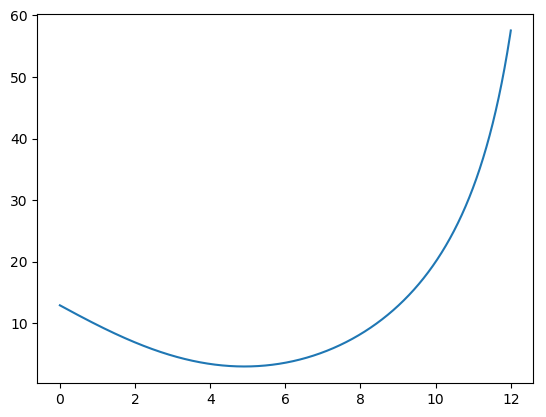

In [22]:
tspan = range(0, stop=12, length=100000)
tout, yout = ode4(F, y0, tspan)
plot(tout, yout);

---

## Analyzing the bisection method

Initially, we know a root $x^*$ is somewhere in the interval $[a,b]$. If we let $x_k$ be the midpoint of the $k$th subinterval, then

$$\left|x^* - x_0\right| \leq \frac{b-a}{2}.$$

In the next iteration, 

$$\left|x^* - x_1\right| \leq \frac{b-a}{4},$$

and in the following iteration,

$$\left|x^* - x_2\right| \leq \frac{b-a}{8},$$

and so on, each time reducing our error by a factor of $2$.

In general,

$$\left|x^* - x_k\right| \leq \frac{b-a}{2^{k+1}} , 
\qquad \text{for $k = 0,1,2,\ldots$}.$$

Suppose we want to compute $x_k$ such that 

$$\left|x^* - x_k\right| \leq \mathtt{atol}.$$

Then we just need to find the smallest positive integer $k$ such that

$$\frac{b-a}{2} \cdot 2^{-k} \leq \mathtt{atol}.$$

That is,

$$\frac{b-a}{2\mathtt{atol}} \leq 2^k,$$

which gives us

$$\log_2\left(\frac{b-a}{2\mathtt{atol}}\right) \leq k,$$

so we just need the first integer $k$ that is larger than $\log_2\left(\frac{b-a}{2\mathtt{atol}}\right)$. Therefore, 

$$k = \left\lceil \log_2\left(\frac{b-a}{2\mathtt{atol}}\right) \right\rceil.$$

In [23]:
atol = 1e-8
a, b = 1., 15.

k = ceil(log2((b - a)/2atol))

30.0

---

## Pros and cons of the bisection method

Pros:

1. **Simple:** The bisection method only requires function values, is easy to understand and implement, and it is easy to analyze.

2. **Robust:** The bisection method is guaranteed to work, provided that $f$ is continuous and changes sign on the interval $[a,b]$.

Cons:

1. **Slow to converge:** The bisection method often requires many function evaluations.

2. **Does not generalize:** The bisection method only applies to solving equations involving one variable; it does not generalize to solving equations involving multiple variables.



---